In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
beer = pd.read_csv('./轮廓系数/data.txt',sep=' ')

In [4]:
beer

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77
5,Old_Milwaukee,145,23,4.6,0.28
6,Augsberger,175,24,5.5,0.40
7,Srohs_Bohemian_Style,149,27,4.7,0.42
8,Miller_Lite,99,10,4.3,0.43
9,Budweiser_Light,113,8,3.7,0.40


In [5]:
from sklearn.metrics import silhouette_score,silhouette_samples

In [6]:
from sklearn.cluster import KMeans

In [7]:
data=beer.iloc[:,1:]

In [8]:
kmeans=KMeans(3)
kmeans.fit(data)

KMeans(n_clusters=3)

In [9]:
silhouette_score(data,kmeans.labels_)

np.float64(0.6731775046455796)

In [10]:
silhouette_samples(data,kmeans.labels_)

array([0.70675469, 0.76452939, 0.72886968, 0.61617846, 0.72693924,
       0.71443876, 0.60338722, 0.69658018, 0.73244266, 0.62713976,
       0.64382053, 0.71134265, 0.41418302, 0.76439083, 0.65086168,
       0.72050474, 0.61676721, 0.69195879, 0.68369738, 0.64876323])

In [11]:
silhouette_samples(data,kmeans.labels_).mean()

np.float64(0.6731775046455796)

In [12]:
ks = range(2,20)
scores=[]
for k in ks:
    kmeans=KMeans(k)
    kmeans.fit(data)
    score=silhouette_score(data,kmeans.labels_)
    scores.append(score)
    print(k,score)

2 0.6917656034079486
3 0.6731775046455796
4 0.47263846958098704
5 0.422548733517202
6 0.3176071267158945
7 0.31575088816254426
8 0.38946337473125997
9 0.28138083933124935
10 0.33061511213823314
11 0.32472080133848924
12 0.2909576701100489
13 0.34567900654223155
14 0.3119158753137912
15 0.2736836031737978
16 0.2849514001174898
17 0.23498077333071996
18 0.16040218538260367
19 0.08423051380151177


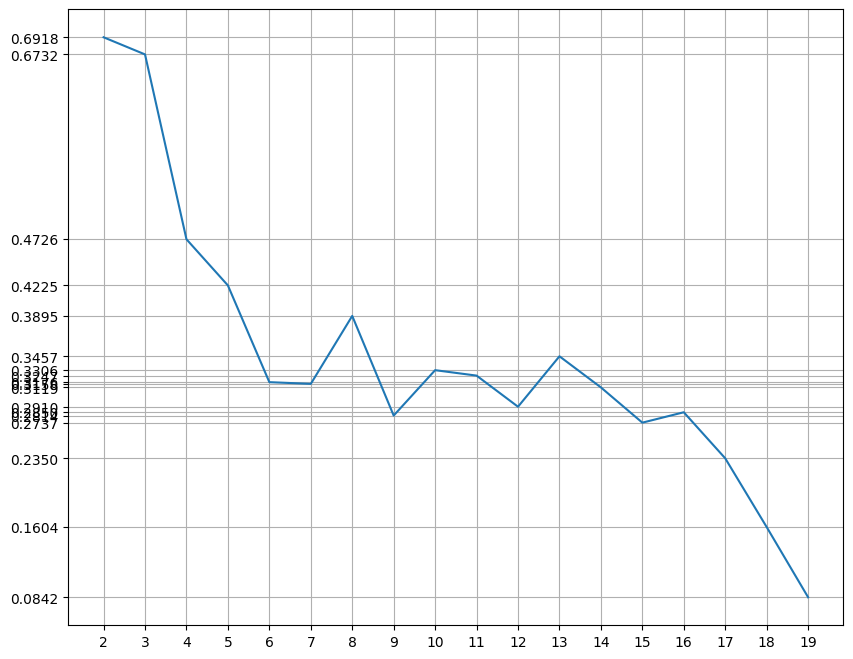

In [15]:
plt.figure(figsize=(10,8))
plt.plot(ks,scores)
plt.xticks(ks)
plt.yticks(scores)
plt.grid()

In [17]:
ks = range(2,20)
inertias=[]
for k in ks:
    kmeans=KMeans(k)
    kmeans.fit(data)
    inertia = kmeans.inertia_
    inertias.append(inertia)
    print(k,inertia)

2 3860.8251976190477
3 2835.9209199999996
4 1239.4006833333333
5 979.1439416666666
6 726.9051342857142
7 657.5596499999999
8 422.74252
9 307.55647999999997
10 219.94871999999998
11 157.3518
12 108.36965000000001
13 115.4279
14 47.85009999999999
15 30.849899999999995
16 9.15655
17 2.65075
18 1.5945
19 0.57445


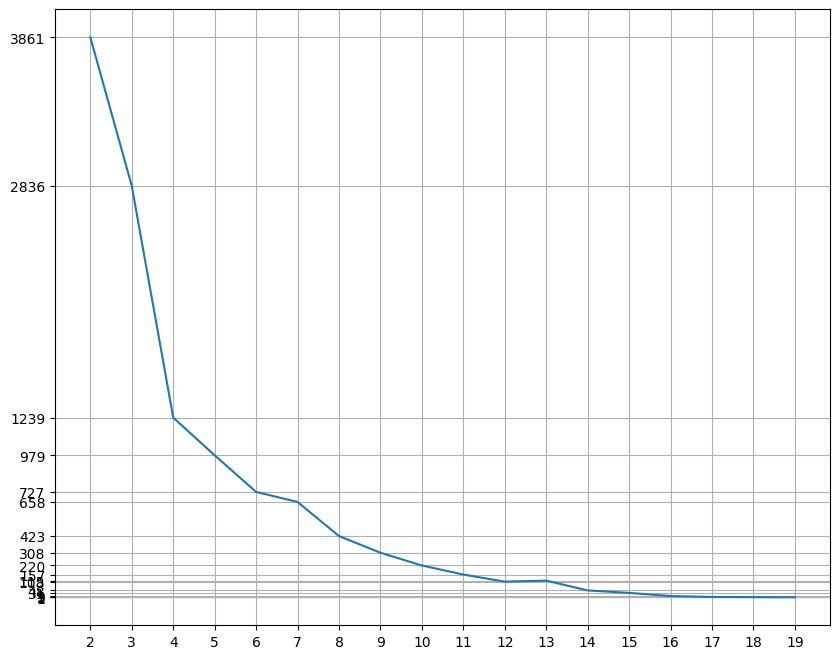

In [19]:
plt.figure(figsize=(10,8))
plt.plot(ks,inertias)
plt.xticks(ks)
plt.yticks(inertias)
plt.grid()

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [22]:
ks = range(2,20)
scores=[]
for k in ks:
    kmeans=KMeans(k)
    kmeans.fit(data)
    score=silhouette_score(data,kmeans.labels_)
    scores.append(score)
    print(k,score)

2 0.6917656034079486
3 0.6731775046455796
4 0.47263846958098704
5 0.422548733517202
6 0.34818782843479507
7 0.30398244573352406
8 0.35807073941270773
9 0.3874759334160638
10 0.3599881191733817
11 0.31010495022075574
12 0.3459775237127248
13 0.30720773917885613
14 0.3074467344022382
15 0.2731460907799226
16 0.2849514001174898
17 0.23498077333071996
18 0.1588091017496281
19 0.08423051380151177


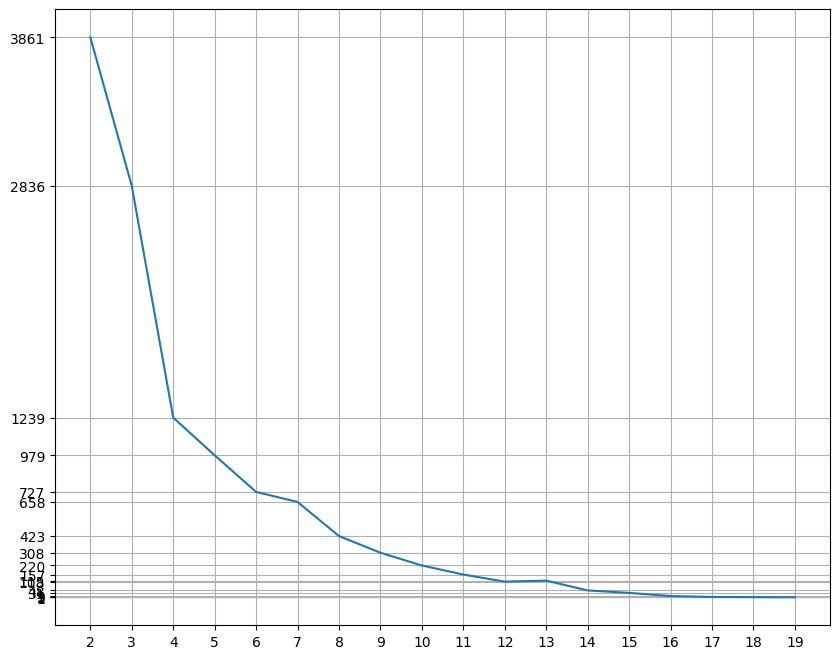

In [23]:
plt.figure(figsize=(10,8))
plt.plot(ks,inertias)
plt.xticks(ks)
plt.yticks(inertias)
plt.grid()

In [24]:
# 有监督学习的时候很喜欢对数据做预处理, 比如标准化处理, 归一化等等. 
# 对无监督数据来说, 我们一般不做数据预处理. 